# Dataset

This project uses the kaggle facial expression recognition dataset.  This dataset will be used for many of lazyprogrammer's deep learning courses.  In this case, I'm going to apply logistic regression to predict the first two classes (emotions).

The dataset is a csv which contains three columns:
1. label, emotion:
    * 0 = Angry
    * 1 = Disgust
    * 2 = Fear
    * 3 = Happy
    * 4 = Sad
    * 5 = Surprise
    * 6 = Neutral
2. pixels, 48 x 48 space separated grayscale
3. train or test set 

The data has been preprocessed so the faces are centered and each face occupies roughly the same amount of space within the image.

## Visualize Data

Below I'm going to take a look at a few examples of each label.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

#importing a function that loads, shuffles and splits data
from util import getData

#class order
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

Xtrain, Ytrain, Xtest, Ytest = getData(balance_ones=False)


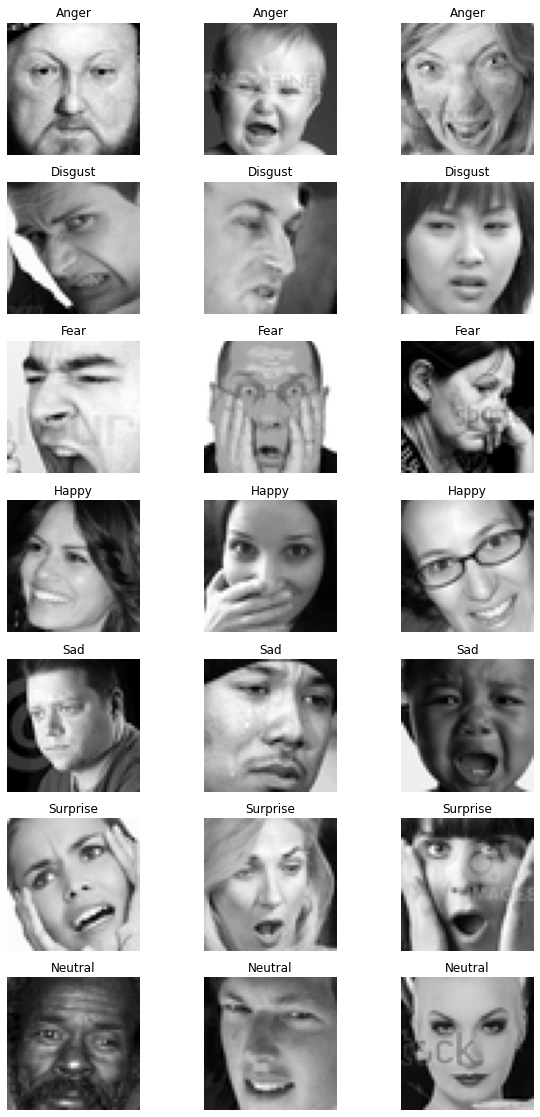

In [2]:
fig = plt.figure(figsize=(10, 20))
num_examples = 3

plot_num = 1
for i in range(len(label_map)):
   x, y = Xtrain[Ytrain==i], Ytrain[Ytrain==i] 
   
   for j in range(num_examples):
       fig.add_subplot(len(label_map), num_examples, plot_num)
       plt.imshow(x[j].reshape(48, 48), cmap = 'gray')
       plt.axis('off')
       plt.title(label_map[y[j]])
       plot_num += 1

plt.show()

## Biased Data

Since we're simply looking at classes 0 and 1, we can clearly see there is an issue - 4,806 observations of class 0 and only 529 observations of class 1.

In [3]:
pd.Series(Ytrain).value_counts()

3    8714
6    6026
4    5924
2    4994
0    4825
5    3876
1     528
dtype: int64

## Other issues

Since logistic regression is simply a linear combination of weights, e.g. works with flat vectors, no relationship between spatial position is retained.  Most neural networks work this way too, except for convolutional neural networks (CNN).

Normalizaiton is needed - pixel intensities 0 - 255 and we need 0 - 1 because this is where the functions of the neural networks are the most sensitive. 

# Set Up Model

I'm setting up the model as a class, similar to sklearn here.

In [13]:
from sklearn.utils import shuffle
from util import getBinaryData, sigmoid, sigmoid_cost, error_rate

#code out logistic regression as class, similar to sklearn
class LogisticModel(object):
    #nothing really to do on initialization
    def __init__(self):
        pass

    #set up model fit
    def fit(self, X, Y, learning_rate=10e-7, reg=0, epochs=10000, show_fig=False):
        #shuffle and split data
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000]
        X, Y = X[:-1000], Y[:-1000]

        #get shape of X
        N, D = X.shape

        #initialize weights
        self.W = np.random.randn(D) / np.sqrt(D)
        self.b = 0

        #initialize for training
        costs = []
        costs_train = []
        best_validation_error = 1

        #train model
        for i in range(epochs):
            pY = self.forward(X)

            #gradient descent step, including regularization
            self.W -= learning_rate*(X.T.dot(pY - Y) + reg*self.W)
            # self.W += learning_rate * (np.dot((Y-pY).T, X) - reg*self.W)
            self.b -= learning_rate*((pY - Y).sum(axis=0) + reg*self.b)
            # self.b += learning_rate*((Y-pY).sum(axis=0) - reg*self.b)

            #every 20 steps calculate cost of validation set
            if i % 20 == 0:
                pYvalid = self.forward(Xvalid)
                c = sigmoid_cost(Yvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.round(pYvalid))

                #keep track of training cost as well
                c_train = sigmoid_cost(Y, pY)
                costs_train.append(c_train)

                #print some debugging help
                print('i:', i, 'cost:', c, 'error:', e, 'train_cost:', c_train)

                #keep track of best validation error
                if e < best_validation_error:
                    best_validation_error = e
        
        print('best_validation_error:', best_validation_error)

        #plot costs
        if show_fig:
            plt.plot(costs)
            plt.show()

    #evaluate log reg to get pY
    def forward(self, X):
        return sigmoid(X.dot(self.W) + self.b)

    #return predicted class for given X
    def predict(self, X):
        pY = self.forward(X)
        return np.round(pY)

    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)

# Train Model

As a resolution to the class imabalance problem, I'm going to first repeat all class 1 data 9 times before using it to train the model.

In [5]:
X, Y = getBinaryData()

#repeat class 1
X0 = X[Y==0, :]
X1 = X[Y==1, :]
X1 = np.repeat(X1, 9, axis=0)
X = np.vstack([X0, X1])
Y = np.array([0]*len(X0) + [1]*len(X1))

Now I can use my model as I would an object from sklearn.

i: 0 cost: 668.48493757706 error: 0.347
i: 20 cost: 728.4810264526989 error: 0.653
i: 40 cost: 729.1917264427209 error: 0.602
i: 60 cost: 730.2313896107341 error: 0.575
i: 80 cost: 731.3966088761392 error: 0.562
i: 100 cost: 732.6640933404278 error: 0.551
i: 120 cost: 734.0138528748112 error: 0.533
i: 140 cost: 735.4184525121677 error: 0.529
i: 160 cost: 736.850343970681 error: 0.524
i: 180 cost: 738.2862076454951 error: 0.523
i: 200 cost: 739.7080840217943 error: 0.525
i: 220 cost: 741.1029774055858 error: 0.519
i: 240 cost: 742.46196625994 error: 0.52
i: 260 cost: 743.779279792886 error: 0.519
i: 280 cost: 745.0515030294458 error: 0.519
i: 300 cost: 746.2769440720729 error: 0.514
i: 320 cost: 747.4551495619501 error: 0.515
i: 340 cost: 748.5865411778746 error: 0.519
i: 360 cost: 749.6721460686424 error: 0.516
i: 380 cost: 750.7133983633086 error: 0.518
i: 400 cost: 751.7119937900788 error: 0.51
i: 420 cost: 752.6697837414675 error: 0.514
i: 440 cost: 753.5886985661318 error: 0.515
i:

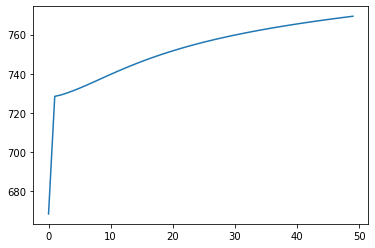

Final Score =  0.6844876468205752


In [8]:
model = LogisticModel()
model.fit(X, Y, epochs=1000, show_fig=True)

print('Final Score = ', model.score(X, Y))

Ok, that was pretty bad, the cost term constantly increased.  Clearly I'm going to have to make some changes.

The first issue that I'm probably seeing is that I'm overfitting the training set.  Since the cost, as displayed above, is being calculated on the validation set I'm seeing a constantly increasing cost as the model is more and more overfit to the training data.  The first thing I'm going to try is to add in a regularization term to see if that reduces my overfitting issue.

i: 0 cost: 527.2336258859266 error: 0.02 train_cost: 8291.903491116147
i: 20 cost: 671.4760573731133 error: 0.395 train_cost: 6119.56283557198
i: 40 cost: 672.6980122445627 error: 0.4 train_cost: 6034.632528694057
i: 60 cost: 674.3224993020374 error: 0.402 train_cost: 5966.012631780782
i: 80 cost: 676.1779256419993 error: 0.419 train_cost: 5909.21490466223
i: 100 cost: 678.1568468184319 error: 0.429 train_cost: 5861.298066721298
i: 120 cost: 680.1877846183545 error: 0.429 train_cost: 5820.2156217991605
i: 140 cost: 682.2227279924214 error: 0.427 train_cost: 5784.491431058362
i: 160 cost: 684.2298021191239 error: 0.425 train_cost: 5753.033540864155
i: 180 cost: 686.1883841785896 error: 0.423 train_cost: 5725.018223090367
i: 200 cost: 688.0857107902982 error: 0.419 train_cost: 5699.814030891221
i: 220 cost: 689.9144932383854 error: 0.41 train_cost: 5676.930279197977
i: 240 cost: 691.6712345303367 error: 0.413 train_cost: 5655.981125370361
i: 260 cost: 693.3550391947981 error: 0.415 train

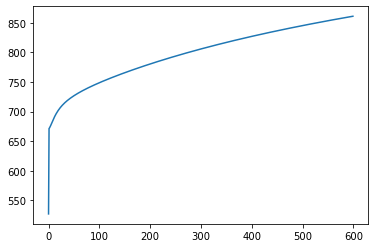

Final Score =  0.7777440259214257


In [19]:
model = LogisticModel()
model.fit(X, Y, reg=0.001, epochs=12000, show_fig=True)

print('Final Score = ', model.score(X, Y))